In [2]:

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib
from plotly.subplots import make_subplots
import plotly.graph_objects as go


import warnings
warnings.filterwarnings("ignore")



In [3]:

# Set max display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
dtypes={'session_id':'category', 
'elapsed_time':np.int32,
    'index':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'page':'category',
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
     'text':'category',
     'fqid':'category',
     'room_fqid':'category',
     'text_fqid':'category',
     'fullscreen':'category',
     'hq':'category',
     'music':'category',
     'level_group':'category'}
work_path = 'data/predict-student-performance-from-game-play/'
train_df=pd.read_csv(work_path+'train.csv', dtype=dtypes)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      category
 1   index           int32   
 2   elapsed_time    int32   
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            category
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  fullscreen      category
 17  hq              category
 18  music           category
 19  level_group     category
dtypes: category(12), float32(5), int32(2), uint8(1)
memory usage: 1.1 GB


In [5]:
train_df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [6]:
import pandas as pd
import numpy as np

# Load your data
df = train_df

# Empty lists to hold column names
continuous_vars = []
discrete_vars = []
categorical_vars = []

# Define a threshold for the maximum number of unique values a variable can have to be considered categorical/discrete
threshold = 10

# Iterate over columns in DataFrame and determine their variable type
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]):
        categorical_vars.append(column)
    elif np.issubdtype(df[column].dtype, np.integer):
        if df[column].nunique() <= threshold:
            discrete_vars.append(column)
        else:
            continuous_vars.append(column)
    elif np.issubdtype(df[column].dtype, np.floating):
        continuous_vars.append(column)
    else:
        print(f'Variable type of {column} is not clearly identifiable')

print(f'Continuous variables: {continuous_vars}')
print(f'Discrete variables: {discrete_vars}')
print(f'Categorical variables: {categorical_vars}')

Continuous variables: ['index', 'elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']
Discrete variables: []
Categorical variables: ['session_id', 'event_name', 'name', 'page', 'text', 'fqid', 'room_fqid', 'text_fqid', 'fullscreen', 'hq', 'music', 'level_group']


### Analyzing each column

In [7]:

# List of continuous variables
continuous_vars = ['room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']

for var in continuous_vars:
    print(f"Descriptive Statistics for {var}:")
    print(df[var].describe())
    print("\n")



Descriptive Statistics for room_coor_x:
count    2.422367e+07
mean    -5.490582e+01
std      5.202926e+02
min     -1.992355e+03
25%     -3.528395e+02
50%     -1.116280e+01
75%      2.966515e+02
max      1.261774e+03
Name: room_coor_x, dtype: float64


Descriptive Statistics for room_coor_y:
count    2.422367e+07
mean    -1.162119e+02
std      2.184710e+02
min     -9.181624e+02
25%     -2.127183e+02
50%     -9.760534e+01
75%      2.268786e+01
max      5.436164e+02
Name: room_coor_y, dtype: float64


Descriptive Statistics for screen_coor_x:
count    2.422367e+07
mean     4.584099e+02
std      2.479389e+02
min      0.000000e+00
25%      2.690000e+02
50%      4.470000e+02
75%      6.630000e+02
max      1.919000e+03
Name: screen_coor_x, dtype: float64


Descriptive Statistics for screen_coor_y:
count    2.422367e+07
mean     3.855858e+02
std      1.298166e+02
min      0.000000e+00
25%      3.040000e+02
50%      3.970000e+02
75%      4.710000e+02
max      1.440000e+03
Name: screen_coor_y, d

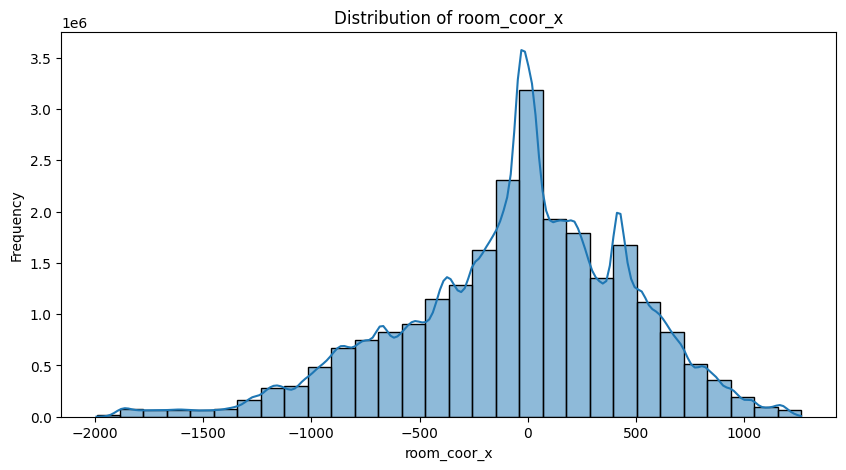

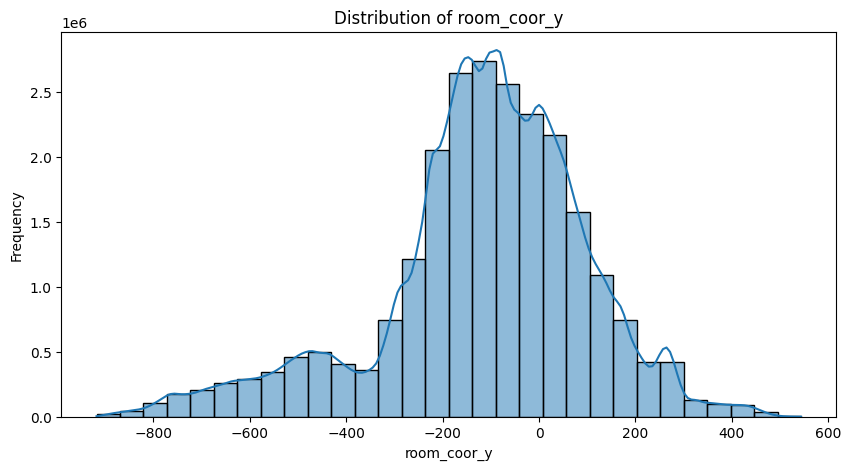

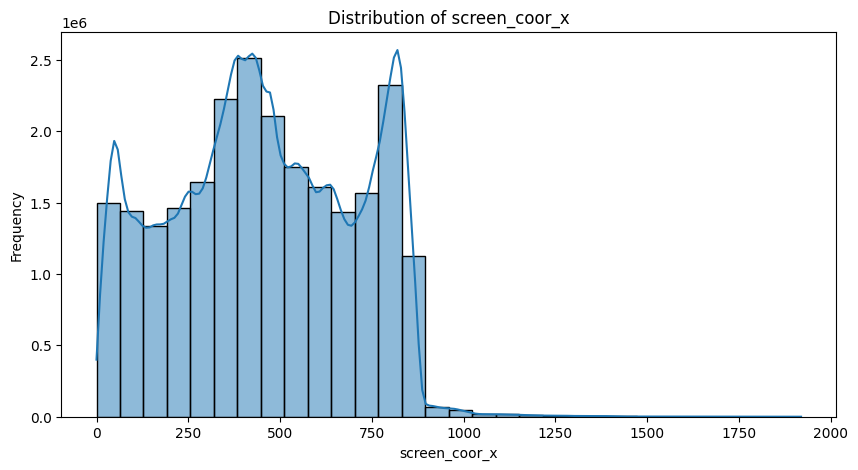

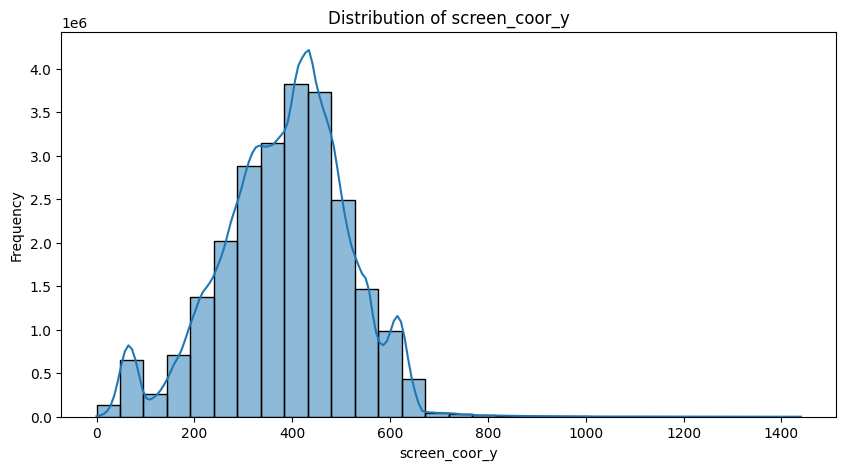

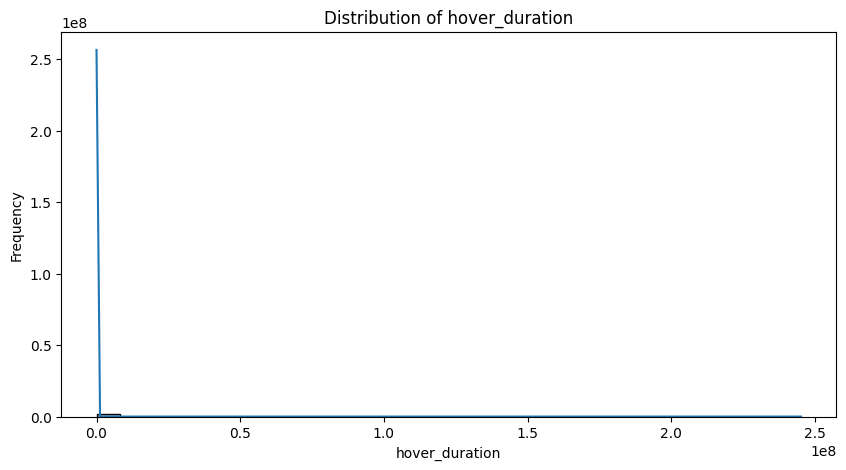

In [8]:
# Histogram (using seaborn) for each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=var, bins=30, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()


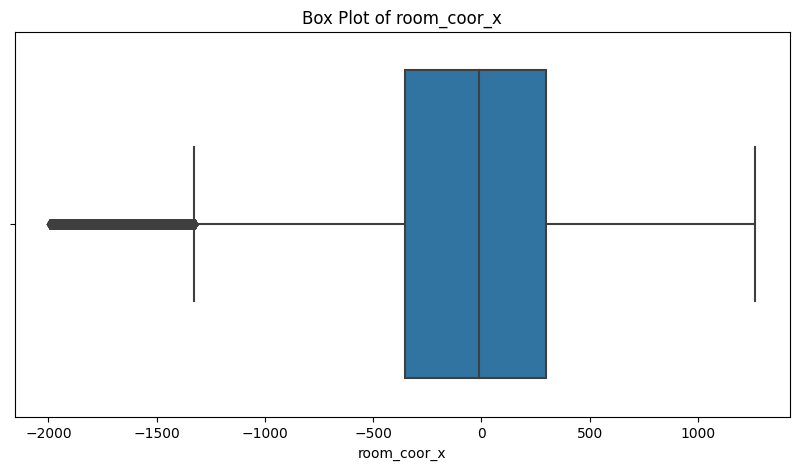

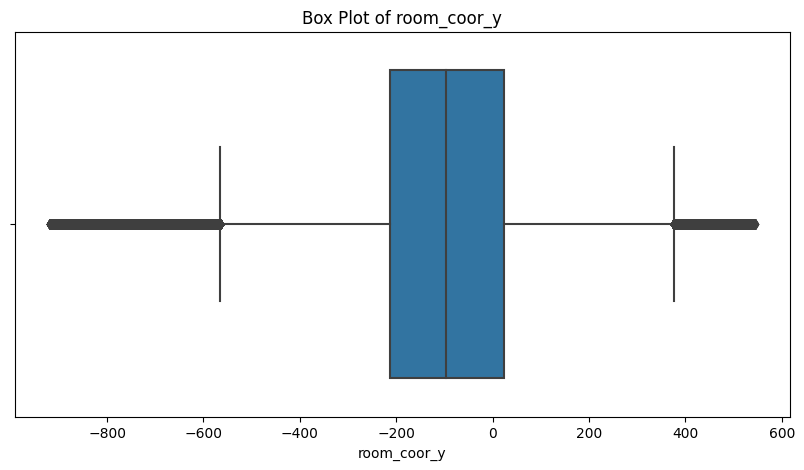

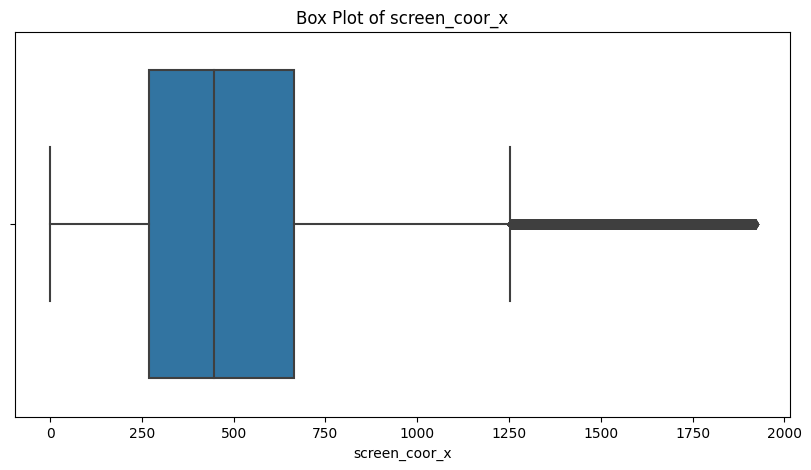

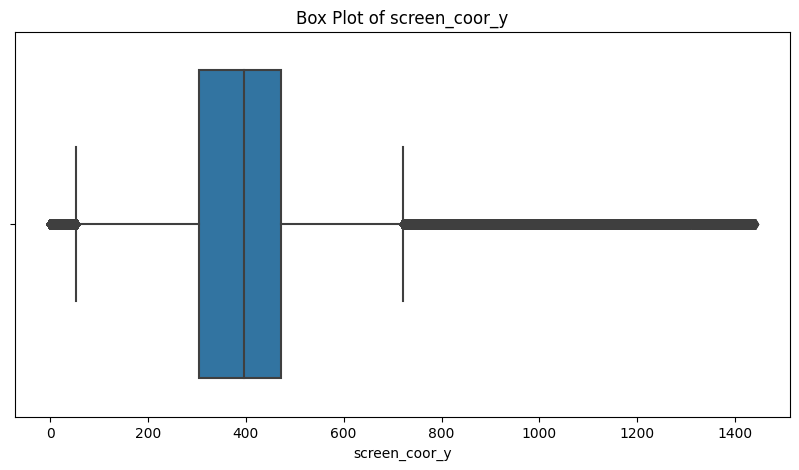

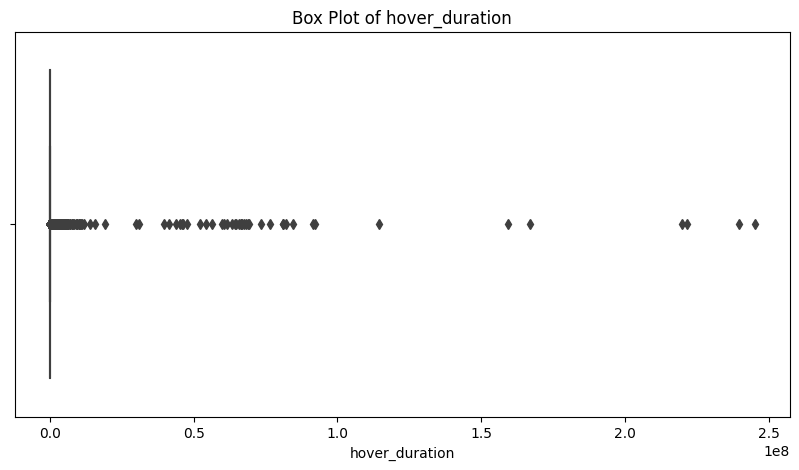

In [9]:
# Box plot for each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=var)
    plt.title(f'Box Plot of {var}')
    plt.show()

In [10]:
train_df.shape 

(26296946, 20)

In [11]:
categorical_vars = ['level','session_id', 'event_name', 'name', 'page', 'text', 'fqid', 'room_fqid', 'text_fqid', 'fullscreen', 'hq', 'music', 'level_group']

In [12]:
for var in categorical_vars:
    print(f"Descriptive Statistics for {var}:")
    print(df[var].isna().sum()/df[var].shape[0])
    print("\n")

Descriptive Statistics for level:
0.0


Descriptive Statistics for session_id:
0.0


Descriptive Statistics for event_name:
0.0


Descriptive Statistics for name:
0.0


Descriptive Statistics for page:
0.9785319557639888


Descriptive Statistics for text:
0.6342868483663464


Descriptive Statistics for fqid:
0.31465307796578357


Descriptive Statistics for room_fqid:
0.0


Descriptive Statistics for text_fqid:
0.6342828555072517


Descriptive Statistics for fullscreen:
0.0


Descriptive Statistics for hq:
0.0


Descriptive Statistics for music:
0.0


Descriptive Statistics for level_group:
0.0




In [13]:
# List of categorical variables
categorical_vars = categorical_vars

for var in categorical_vars:
    print(f"Descriptive Statistics for {var}:")
    print(df[var].describe())
    print("\n")




Descriptive Statistics for level:
count    2.629695e+07
mean     1.219169e+01
std      6.497789e+00
min      0.000000e+00
25%      6.000000e+00
50%      1.300000e+01
75%      1.800000e+01
max      2.200000e+01
Name: level, dtype: float64


Descriptive Statistics for session_id:
count              26296946
unique                23562
top       20110310463989760
freq                  19032
Name: session_id, dtype: object


Descriptive Statistics for event_name:
count           26296946
unique                11
top       navigate_click
freq            11326433
Name: event_name, dtype: object


Descriptive Statistics for name:
count      26296946
unique            6
top       undefined
freq       12705785
Name: name, dtype: object


Descriptive Statistics for page:
count     564544
unique         7
top          5.0
freq      101171
Name: page, dtype: object


Descriptive Statistics for text:
count       9617139
unique          597
top       undefined
freq         355969
Name: text, dtype: 

In [14]:
for var in categorical_vars:
    print(f"Descriptive Statistics for {var}:")
    print(df[var].value_counts())
    print("\n")

Descriptive Statistics for level:
level
18    3499163
6     2117796
21    2110010
11    1937208
16    1295082
7     1278207
15    1219497
19    1217088
17    1207881
3     1144768
9     1137748
20    1129246
2      992615
8      888584
13     823875
1      726590
0      688992
5      668188
14     550829
10     449139
4      428040
22     419032
12     367368
Name: count, dtype: int64


Descriptive Statistics for session_id:
session_id
20110310463989760    19032
20110515090304556     6000
21110313432157404     5435
21010312074134348     4803
20110219555923044     4743
                     ...  
21090109332150240      639
21000013055772070      637
21030108504475890      635
20110112402567744      634
22000610592348800      591
Name: count, Length: 23562, dtype: int64


Descriptive Statistics for event_name:
event_name
navigate_click        11326433
person_click           6052853
cutscene_click         2703035
object_click           2198211
object_hover           1057085
map_hover      

In [26]:
for var in categorical_vars:
    print(f"Descriptive Statistics for {var}:")
    print(df[var].nunique())
    print("\n")

Descriptive Statistics for level:
23


Descriptive Statistics for session_id:
23562


Descriptive Statistics for event_name:
11


Descriptive Statistics for name:
6


Descriptive Statistics for page:
7


Descriptive Statistics for text:
597


Descriptive Statistics for fqid:
128


Descriptive Statistics for room_fqid:
19


Descriptive Statistics for text_fqid:
126


Descriptive Statistics for fullscreen:
2


Descriptive Statistics for hq:
2


Descriptive Statistics for music:
2


Descriptive Statistics for level_group:
3




In [15]:
# Frequency distribution for each categorical variable
for var in categorical_vars:
    print(f"Frequency Distribution for {var}:")
    print(df[var].value_counts())
    print("\n")

Frequency Distribution for level:
level
18    3499163
6     2117796
21    2110010
11    1937208
16    1295082
7     1278207
15    1219497
19    1217088
17    1207881
3     1144768
9     1137748
20    1129246
2      992615
8      888584
13     823875
1      726590
0      688992
5      668188
14     550829
10     449139
4      428040
22     419032
12     367368
Name: count, dtype: int64


Frequency Distribution for session_id:
session_id
20110310463989760    19032
20110515090304556     6000
21110313432157404     5435
21010312074134348     4803
20110219555923044     4743
                     ...  
21090109332150240      639
21000013055772070      637
21030108504475890      635
20110112402567744      634
22000610592348800      591
Name: count, Length: 23562, dtype: int64


Frequency Distribution for event_name:
event_name
navigate_click        11326433
person_click           6052853
cutscene_click         2703035
object_click           2198211
object_hover           1057085
map_hover      

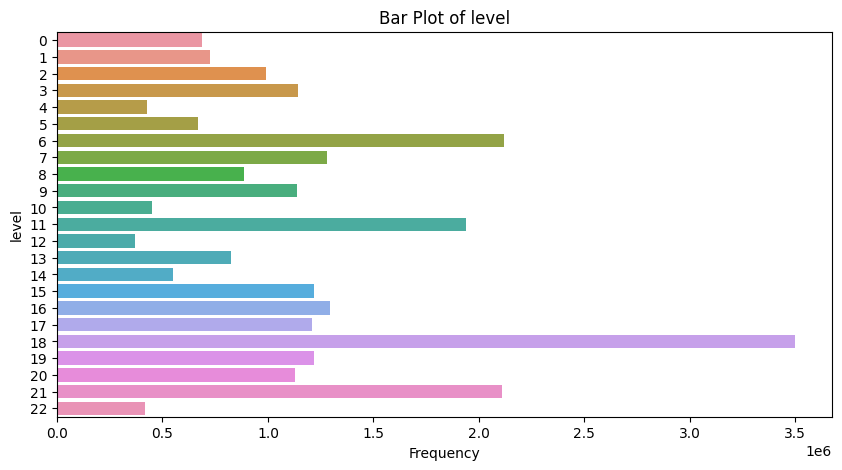

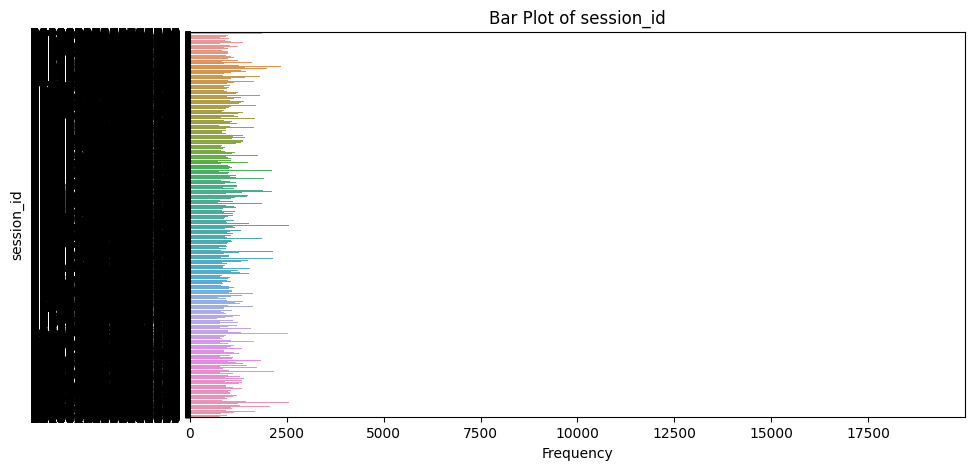

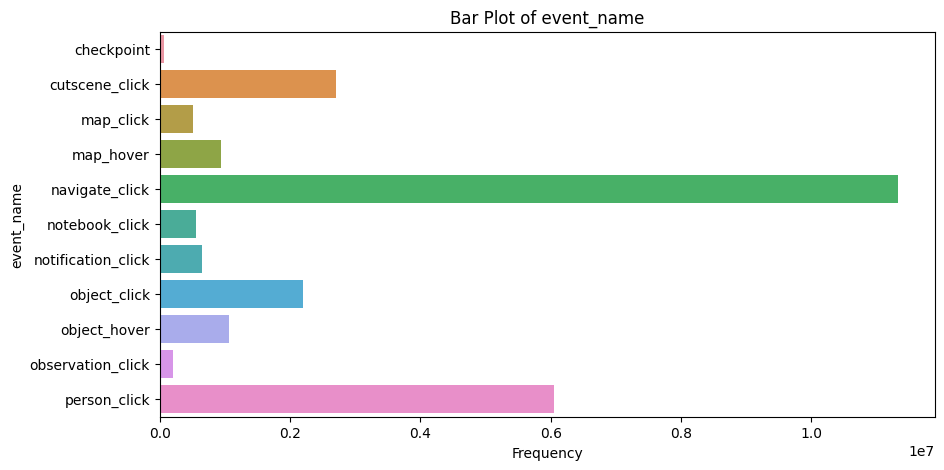

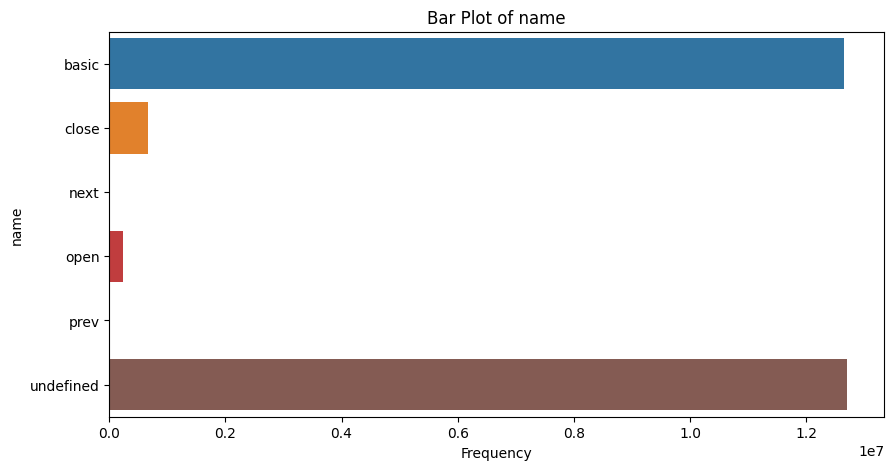

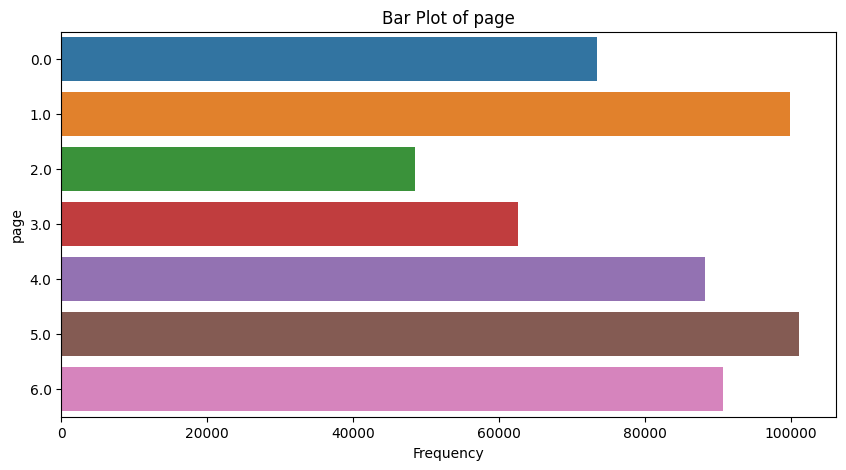

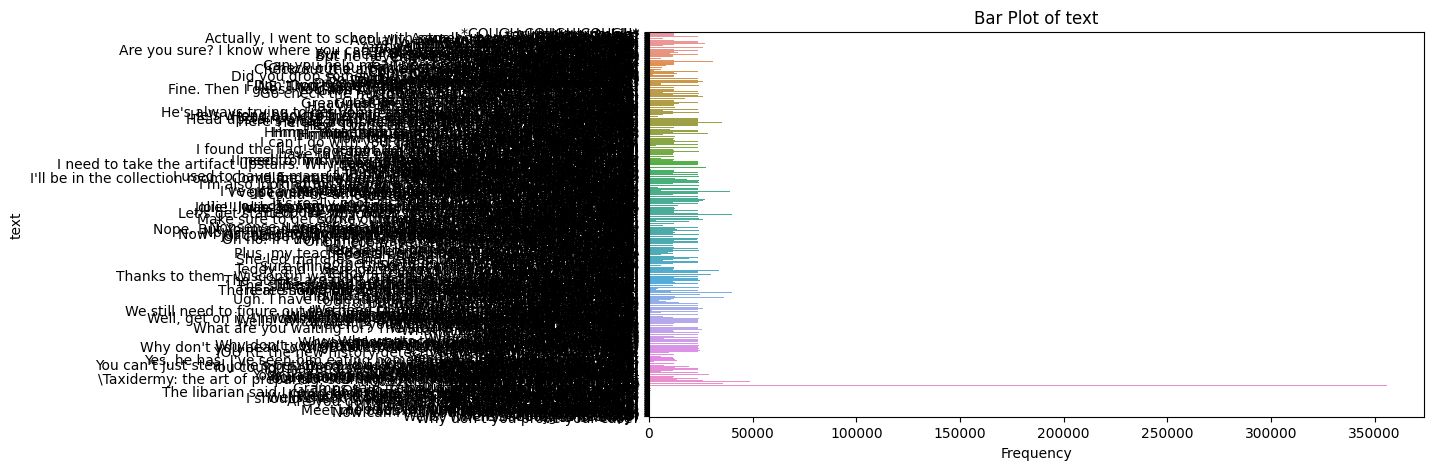

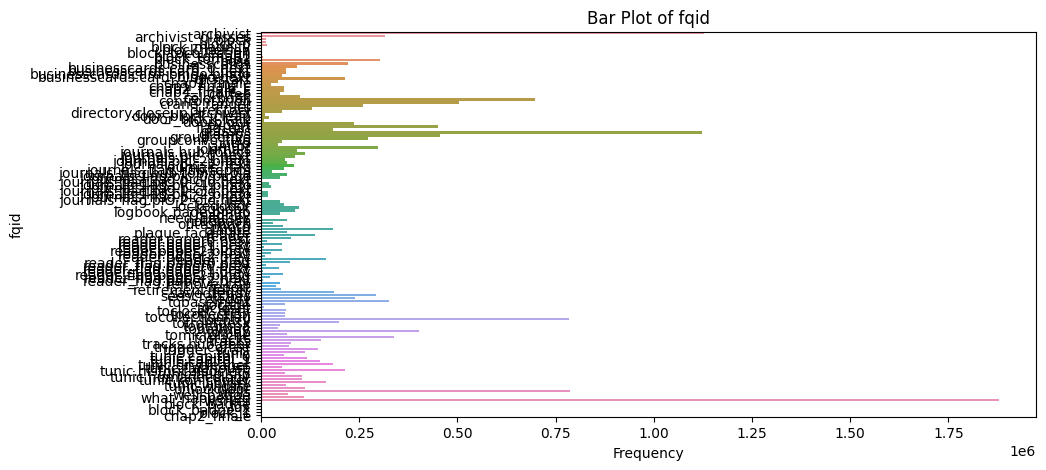

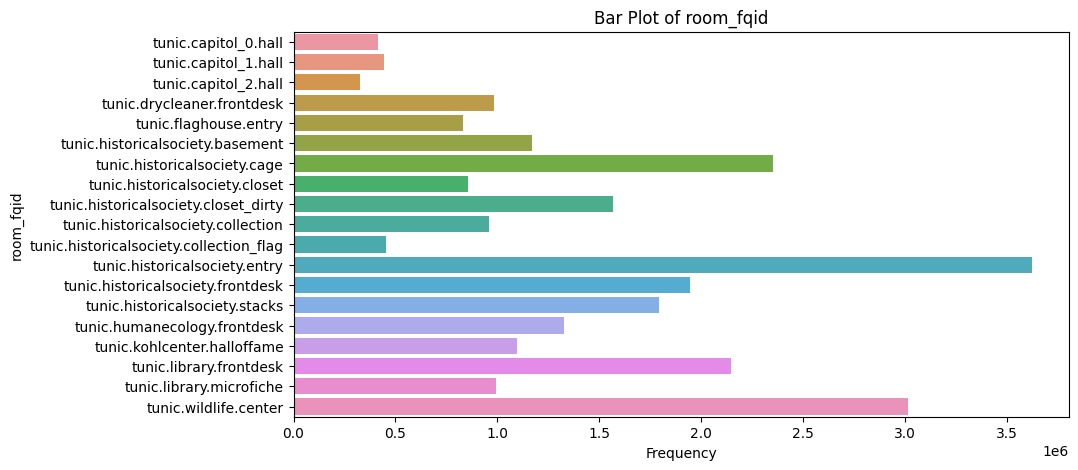

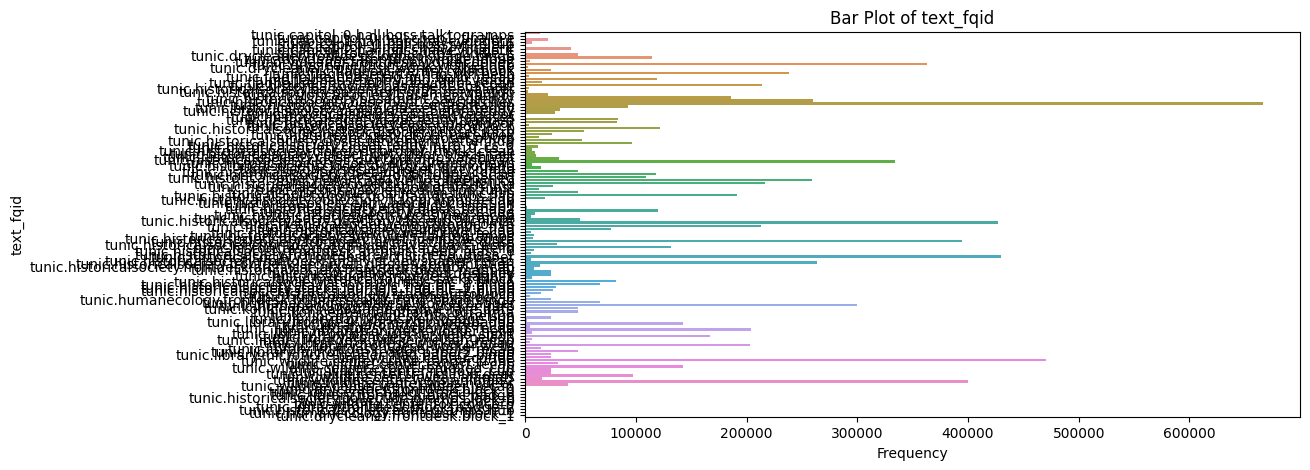

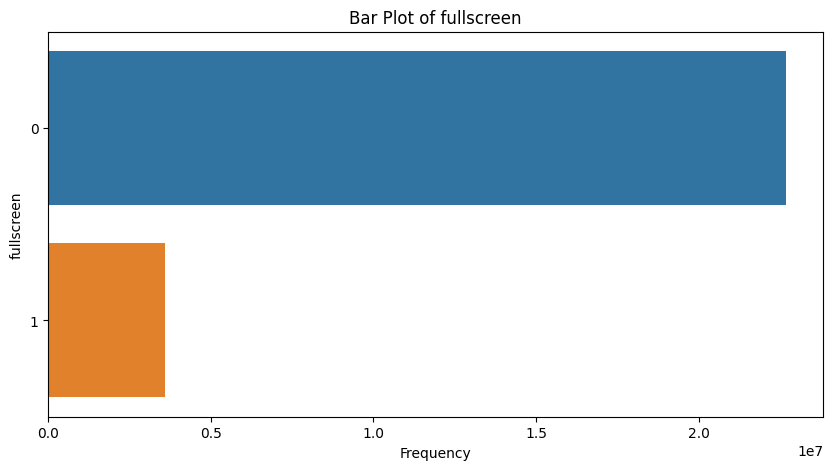

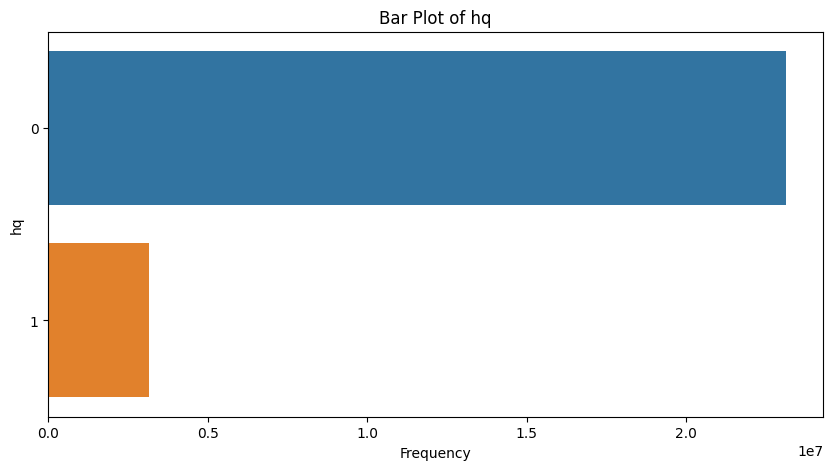

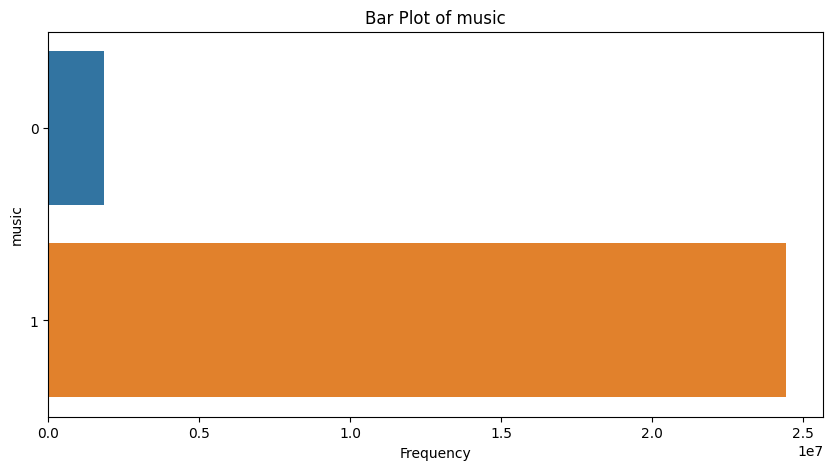

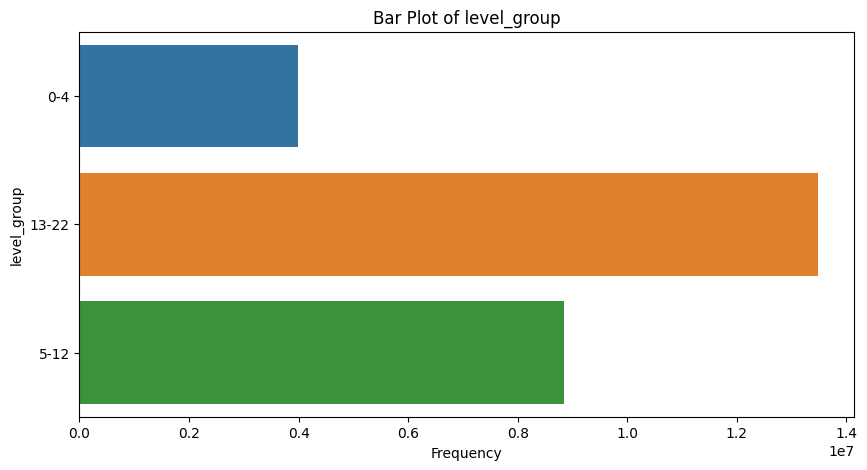

In [16]:
# Bar plot (using seaborn) for each categorical variable 
for var in categorical_vars:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, y=var)
    plt.xlabel('Frequency')
    plt.ylabel(var)
    plt.title(f'Bar Plot of {var}')
    plt.show()

### Exploring 1 session

In [17]:
test_session = train_df.query('session_id == "20090312431273200"')

In [25]:
test_session.head(5)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


# Correlation continious variables

In [19]:
correlation_matrix = test_session[['elapsed_time', 'level', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']].corr()

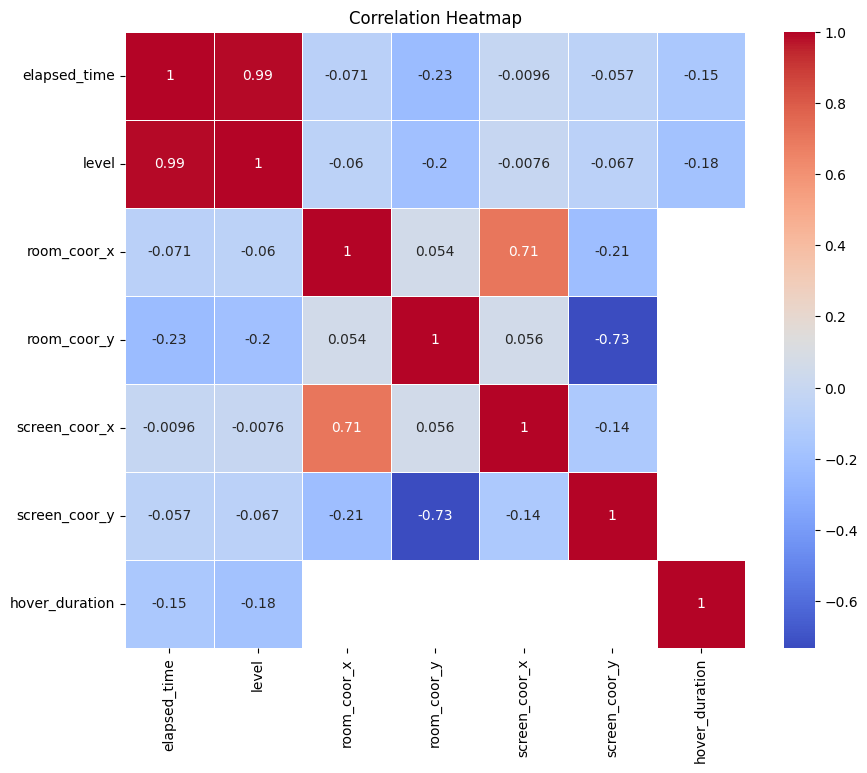

In [20]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.show()

In [21]:
train_df.groupby(['fqid','level'])['fqid'].count().head(100)

fqid               level
archivist          0             0
                   1             0
                   2             0
                   3             0
                   4             0
                   5             0
                   6        609358
                   7         39600
                   8           115
                   9           891
                   10            0
                   11       467896
                   12         9481
                   13            0
                   14            0
                   15            0
                   16            0
                   17            0
                   18            0
                   19            0
                   20            0
                   21            0
                   22            0
archivist_glasses  0             0
                   1             0
                   2             0
                   3             0
                   4          

In [22]:
test_session.query('level == 11').head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
394,20090312431273200,404,432132,navigate_click,undefined,11,NaN,-693.153137,2.560692,15.0,328.0,NaN,NaN,NaN,tunic.library.frontdesk,NaN,0,0,1,5-12
395,20090312431273200,405,433133,navigate_click,undefined,11,NaN,-769.627686,18.197056,38.0,316.0,NaN,NaN,NaN,tunic.library.frontdesk,NaN,0,0,1,5-12
396,20090312431273200,406,434283,navigate_click,undefined,11,NaN,-808.121887,44.257660,61.0,296.0,NaN,NaN,toentry,tunic.library.frontdesk,NaN,0,0,1,5-12
397,20090312431273200,407,434398,map_hover,basic,11,NaN,NaN,NaN,NaN,NaN,17.0,NaN,tunic.library,tunic.library.frontdesk,NaN,0,0,1,5-12
398,20090312431273200,408,436453,map_click,undefined,11,NaN,-385.127380,46.863724,451.0,294.0,NaN,NaN,tunic.capitol_1,tunic.library.frontdesk,NaN,0,0,1,5-12


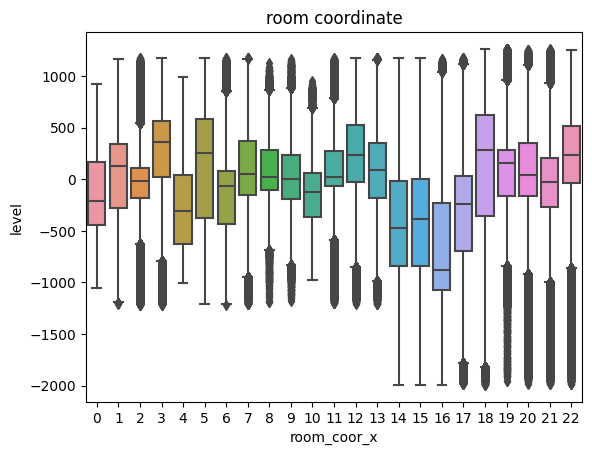

In [23]:
sns.boxplot(x='level', y='room_coor_x', data=train_df)
plt.title('room coordinate')
plt.xlabel('room_coor_x')
plt.ylabel('level')
plt.show()

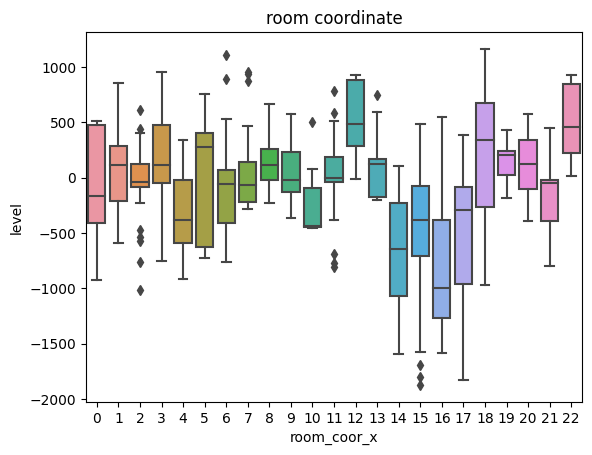

In [24]:
sns.boxplot(x='level', y='room_coor_x', data=test_session)
plt.title('room coordinate')
plt.xlabel('room_coor_x')
plt.ylabel('level')
plt.show()

### Feature engineering

In [71]:
df1 = train_df.query('level_group == "0-4"')
df2 = test_session.query('level_group == "5-12"')
df3 = test_session.query('level_group == "13-22"')

In [72]:
df1.columns

Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'fullscreen', 'hq', 'music', 'level_group'],
      dtype='object')

In [134]:
df1['time_diff'] = df1['elapsed_time'] - df1['elapsed_time'].shift(1)
df1['room_coor_x_diff'] = df1['room_coor_x'] - df1['room_coor_x'].shift(1)
df1['room_coor_y_diff'] = df1['room_coor_y'] - df1['room_coor_y'].shift(1)
df1['screen_coor_x_diff'] = df1['screen_coor_x'] - df1['screen_coor_x'].shift(1)
df1['screen_coor_y_diff'] = df1['screen_coor_y'] - df1['screen_coor_y'].shift(1)

# text Not nan
df1['text_value'] = df1['text'].isna().astype('int')


In [74]:
# Load your data
df = df1

# Empty lists to hold column names
continuous_vars = []
discrete_vars = []
categorical_vars = []

# Define a threshold for the maximum number of unique values a variable can have to be considered categorical/discrete
threshold = 10

# Iterate over columns in DataFrame and determine their variable type
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]):
        categorical_vars.append(column)
    elif np.issubdtype(df[column].dtype, np.integer):
        if df[column].nunique() <= threshold:
            discrete_vars.append(column)
        else:
            continuous_vars.append(column)
    elif np.issubdtype(df[column].dtype, np.floating):
        continuous_vars.append(column)
    else:
        print(f'Variable type of {column} is not clearly identifiable')

print(f'Continuous variables: {continuous_vars}')
print(f'Discrete variables: {discrete_vars}')
print(f'Categorical variables: {categorical_vars}')

Continuous variables: ['index', 'elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration', 'time_diff', 'room_coor_x_diff', 'room_coor_y_diff', 'screen_coor_x_diff', 'screen_coor_y_diff']
Discrete variables: ['level']
Categorical variables: ['session_id', 'event_name', 'name', 'page', 'text', 'fqid', 'room_fqid', 'text_fqid', 'fullscreen', 'hq', 'music', 'level_group']


In [75]:
CATEGORICAL = [ 'event_name', 'name', 'page', 'text', 'fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['elapsed_time', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration', 'time_diff', 'room_coor_x_diff', 'room_coor_y_diff', 'screen_coor_x_diff', 'screen_coor_y_diff']

In [129]:
df1.head(5)#.groupby(['session_id','text_fqid'])['time_diff'].count()


,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,time_diff,room_coor_x_diff,room_coor_y_diff,screen_coor_x_diff,screen_coor_y_diff
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4,0.0,NaN,NaN,NaN,NaN
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,1323.0,0.0,0.0,0.0,0.0
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,-492.0,0.0,0.0,0.0,0.0
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,316.0,0.0,0.0,0.0,0.0
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4,716.0,1.0,0.0,1.0,0.0


In [133]:
df1.groupby(['session_id','room_fqid'])['time_diff'].mean()

session_id         room_fqid                   
20090312431273200  tunic.capitol_0.hall            16211.00
                   tunic.capitol_1.hall                 NaN
                   tunic.capitol_2.hall                 NaN
                   tunic.drycleaner.frontdesk           NaN
                   tunic.flaghouse.entry                NaN
                                                     ...   
22100221145014656  tunic.humanecology.frontdesk         NaN
                   tunic.kohlcenter.halloffame      1158.62
                   tunic.library.frontdesk              NaN
                   tunic.library.microfiche             NaN
                   tunic.wildlife.center                NaN
Name: time_diff, Length: 447678, dtype: float64

In [135]:

# time between text values 
df1.groupby(['session_id','text_value'])['time_diff'].mean()

session_id         text_value
20090312431273200  0             1082.852459
                   1             1250.543689
20090312433251036  0            -1525.262295
                   1             1691.448718
20090312455206810  0            -2356.868421
                                    ...     
22100217104993650  1             2159.809160
22100219442786200  0            -5732.377049
                   1             1242.858491
22100221145014656  0              -67.319444
                   1             1785.431655
Name: time_diff, Length: 47124, dtype: float64

In [136]:
# averange coordinate distance between text values 
df1.groupby(['session_id','text_value'])['room_coor_x'].mean()

session_id         text_value
20090312431273200  0              82.651031
                   1             -41.733669
20090312433251036  0            -128.311600
                   1             -44.912571
20090312455206810  0            -184.254013
                                    ...    
22100217104993650  1              11.843848
22100219442786200  0             -28.325773
                   1             -70.563507
22100221145014656  0               8.662521
                   1              -7.010103
Name: room_coor_x, Length: 47124, dtype: float32

In [108]:
def feature_engineer(dataset_df):
    dfs = []
    for c in CATEGORICAL:
        tmp = dataset_df.groupby(['session_id','level'])[c].agg('nunique')
        tmp.name = tmp.name + '_nunique'
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id','level'])[c].agg('mean')
        tmp.name = tmp.name + '_mean'
        dfs.append(tmp)
    for c in NUMERICAL:
        tmp = dataset_df.groupby(['session_id','level'])[c].agg('std')
        tmp.name = tmp.name + '_std'
        dfs.append(tmp)
    dataset_df = pd.concat(dfs,axis=1)
    dataset_df = dataset_df.fillna(-1)
    dataset_df = dataset_df.reset_index()
    dataset_df = dataset_df.set_index(['session_id', 'level'])
    return dataset_df

In [109]:
test = feature_engineer(df1)

In [110]:
test

event_name_nunique  name_nunique  page_nunique  \
session_id        level                                                   
20090312431273200 0                       6             3             0   
                  1                       6             3             0   
                  2                       6             3             0   
                  3                       9             3             0   
                  4                       4             2             0   
...                                     ...           ...           ...   
22100221145014656 0                       7             3             0   
                  1                       4             3             0   
                  2                       6             3             0   
                  3                      10             4             1   
                  4                       5             4             1   

                         text_nunique  fqid_nunique  room_fqid_nunique  \
session_id        level                                                  
20090312431273200 0                12             5                  1   
                  1                19             6                  3   
                  2                22             8                  2   
                  3                 7            13                  6   
                  4                 0             5                  2   
...                               ...           ...                ...   
22100221145014656 0                15             6                  1   
                  1                15             4                  3   
                  2                27             7                  2   
                  3                 8            10                  4   
                  4                 0             5                  2   

                         text_fqid_nunique  elapsed_time_mean  \
session_id        level                                         
20090312431273200 0                      6       12741.821429   
                  1                      3       47940.750000   
                  2                      5       84409.692308   
                  3                      5      129464.452830   
                  4                      0      162420.615385   
...                                    ...                ...   
22100221145014656 0                      6       42366.121951   
                  1                      1      103467.090909   
                  2                      6      184984.549020   
                  3                      4      291323.233766   
                  4                      0      354120.250000   

                         room_coor_x_mean  room_coor_y_mean  \
session_id        level                                       
20090312431273200 0            -77.966362       -170.396027   
                  1             40.961052        -51.532104   
                  2            -32.314056        -20.021652   
                  3            129.078979        -73.856003   
                  4           -314.366455        -33.835960   
...                                   ...               ...   
22100221145014656 0           -165.911423       -103.300438   
                  1             91.271545        -24.640110   
                  2            -59.475132          4.158401   
                  3            183.235870        -34.015526   
                  4           -326.944641        -56.171494   

                         screen_coor_x_mean  screen_coor_y_mean  \
session_id        level                                           
20090312431273200 0              414.250000          463.571442   
                  1              479.193542          356.612915   
                  2              411.783783          344.459473   
                  3              535.359985          387.859985   
                  

In [111]:
# Unstack level and level_group from index
df_unstack = test.unstack('level')

# Concatenate column names
df_unstack.columns = ['_'.join(map(str, col)) for col in df_unstack.columns]

In [112]:
df_unstack

,event_name_nunique_0,event_name_nunique_1,event_name_nunique_2,event_name_nunique_3,event_name_nunique_4,name_nunique_0,name_nunique_1,name_nunique_2,name_nunique_3,name_nunique_4,page_nunique_0,page_nunique_1,page_nunique_2,page_nunique_3,page_nunique_4,text_nunique_0,text_nunique_1,text_nunique_2,text_nunique_3,text_nunique_4,fqid_nunique_0,fqid_nunique_1,fqid_nunique_2,fqid_nunique_3,fqid_nunique_4,room_fqid_nunique_0,room_fqid_nunique_1,room_fqid_nunique_2,room_fqid_nunique_3,room_fqid_nunique_4,text_fqid_nunique_0,text_fqid_nunique_1,text_fqid_nunique_2,text_fqid_nunique_3,text_fqid_nunique_4,elapsed_time_mean_0,elapsed_time_mean_1,elapsed_time_mean_2,elapsed_time_mean_3,elapsed_time_mean_4,room_coor_x_mean_0,room_coor_x_mean_1,room_coor_x_mean_2,room_coor_x_mean_3,room_coor_x_mean_4,room_coor_y_mean_0,room_coor_y_mean_1,room_coor_y_mean_2,room_coor_y_mean_3,room_coor_y_mean_4,screen_coor_x_mean_0,screen_coor_x_mean_1,screen_coor_x_mean_2,screen_coor_x_mean_3,screen_coor_x_mean_4,screen_coor_y_mean_0,screen_coor_y_mean_1,screen_coor_y_mean_2,screen_coor_y_mean_3,screen_coor_y_mean_4,hover_duration_mean_0,hover_duration_mean_1,hover_duration_mean_2,hover_duration_mean_3,hover_duration_mean_4,time_diff_mean_0,time_diff_mean_1,time_diff_mean_2,time_diff_mean_3,time_diff_mean_4,room_coor_x_diff_mean_0,room_coor_x_diff_mean_1,room_coor_x_diff_mean_2,room_coor_x_diff_mean_3,room_coor_x_diff_mean_4,room_coor_y_diff_mean_0,room_coor_y_diff_mean_1,room_coor_y_diff_mean_2,room_coor_y_diff_mean_3,room_coor_y_diff_mean_4,screen_coor_x_diff_mean_0,screen_coor_x_diff_mean_1,screen_coor_x_diff_mean_2,screen_coor_x_diff_mean_3,screen_coor_x_diff_mean_4,screen_coor_y_diff_mean_0,screen_coor_y_diff_mean_1,screen_coor_y_diff_mean_2,screen_coor_y_diff_mean_3,screen_coor_y_diff_mean_4,elapsed_time_std_0,elapsed_time_std_1,elapsed_time_std_2,elapsed_time_std_3,elapsed_time_std_4,room_coor_x_std_0,room_coor_x_std_1,room_coor_x_std_2,room_coor_x_std_3,room_coor_x_std_4,room_coor_y_std_0,room_coor_y_std_1,room_coor_y_std_2,room_coor_y_std_3,room_coor_y_std_4,screen_coor_x_std_0,screen_coor_x_std_1,screen_coor_x_std_2,screen_coor_x_std_3,screen_coor_x_std_4,screen_coor_y_std_0,screen_coor_y_std_1,screen_coor_y_std_2,screen_coor_y_std_3,screen_coor_y_std_4,hover_duration_std_0,hover_duration_std_1,hover_duration_std_2,hover_duration_std_3,hover_duration_std_4,time_diff_std_0,time_diff_std_1,time_diff_std_2,time_diff_std_3,time_diff_std_4,room_coor_x_diff_std_0,room_coor_x_diff_std_1,room_coor_x_diff_std_2,room_coor_x_diff_std_3,room_coor_x_diff_std_4,room_coor_y_diff_std_0,room_coor_y_diff_std_1,room_coor_y_diff_std_2,room_coor_y_diff_std_3,room_coor_y_diff_std_4,screen_coor_x_diff_std_0,screen_coor_x_diff_std_1,screen_coor_x_diff_std_2,screen_coor_x_diff_std_3,screen_coor_x_diff_std_4,screen_coor_y_diff_std_0,screen_coor_y_diff_std_1,screen_coor_y_diff_std_2,screen_coor_y_diff_std_3,screen_coor_y_diff_std_4
session_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20090312431273200,6,6,6,9,4,3,3,3,3,2,0,0,0,0,0,12,19,22,7,0,5,6,8,13,5,1,3,2,6,2,6,3,5,5,0,12741.821429,47940.750000,84409.692308,129464.452830,162420.615385,-77.966362,40.961052,-32.314056,129.078979,-314.366455,-170.396027,-51.532104,-20.021652,-73.856003,-33.835960,414.250000,479.193542,411.783783,535.359985,149.399994,463.571442,356.612915,344.459473,387.859985,358.200012,-1.0,7899.0,2174.500000,2200.333252,133.5,954.296296,1240.406250,903.948718,1038.509434,3008.153846,7.685923,-8.541111,-13.559101,9.503053,-53.224636,13.276666,-11.586447,-15.211848,-2.584768,0.960047,16.370371,-26.433332,-6.057143,-1.479167,-41.666668,-15.481482,11.633333,10.342857,4.791667,-7.222222,8145.742915,10584.366210,10701.095350,16499.406370,10018.628944,469.524328,358.166662,324.386196,389.874453,422.014525,84.862476,116.538196,158.503091,117.002236,41.143422,211.047234,188.452544,178.524529,204.998931,181.

### Train labels 

In [31]:
train_label = pd.read_csv(work_path+'train_labels.csv')
train_label['session'] = train_label.session_id.apply(lambda x: int(x.split('_')[0]) )
train_label['q'] = train_label.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )
print( 'shape of label dataset is:',train_label.shape )


shape of label dataset is: (424116, 4)


In [35]:
train_label.query('session == 20090312431273200').head(500)

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
23562,20090312431273200_q2,1,20090312431273200,2
47124,20090312431273200_q3,1,20090312431273200,3
70686,20090312431273200_q4,1,20090312431273200,4
94248,20090312431273200_q5,1,20090312431273200,5
117810,20090312431273200_q6,1,20090312431273200,6
141372,20090312431273200_q7,1,20090312431273200,7
164934,20090312431273200_q8,1,20090312431273200,8
188496,20090312431273200_q9,1,20090312431273200,9
212058,20090312431273200_q10,1,20090312431273200,10


<Axes: xlabel='q', ylabel='count'>

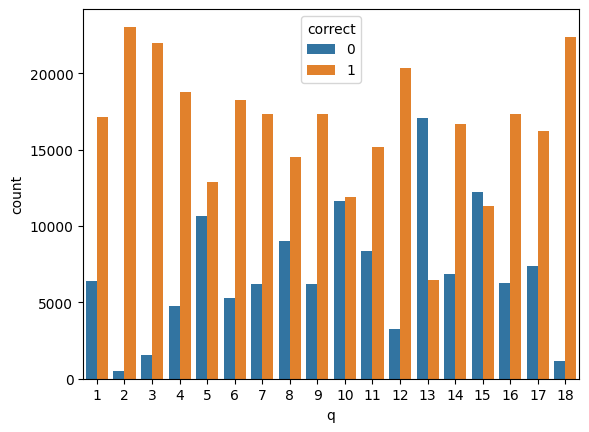

In [34]:
sns.countplot(x = train_label['q'],hue=train_label['correct'])